In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
#The formulas to get the rel eff dof, g*
def integrate_boson(temp, mass, prefactor):
    function_boson = lambda u: prefactor*15/(np.pi)**4*(u**2-(mass/temp)**2)**(1/2)*u**2/(np.exp(u)-1)
    answer_boson, error = integrate.quad(function_boson, mass/temp, np.inf)
    return answer_boson, error

def integrate_fermion(temp, mass, prefactor):
    function_fermion = lambda u: prefactor*15/(np.pi)**4*(u**2-(mass/temp)**2)**(1/2)*u**2/(np.exp(u)+1)
    answer_fermion, error = integrate.quad(function_fermion, mass/temp, np.inf) 
    return answer_fermion, error

32
32
32
7780


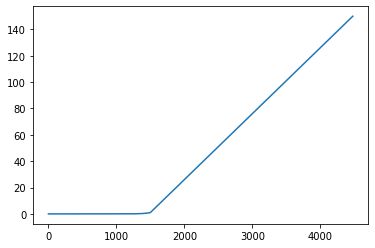

In [3]:
#The rest masses, number of helicity states, boson/fermion, and temperature range
masses_lower = [0, 0, 0.51, 106, 135, 140]
masses_SM_upper = [0, 0, 0, 0.51, 106, 5, 9, 115, 1.3*10**3, 1.8*10**3, 4.4*10**3, 80*10**3, 91*10**3, 114*10**3, 174*10**3]
masses_SUSY = 10*[10**7]+7*[10**8]
masses_upper = masses_SM_upper + masses_SUSY
print(len(masses_upper))
#Just use order of list as in paper

helicities_lower = [2, 6, 4, 4, 2, 1]
helicities_SM_upper = [2, 6, 16, 4, 4, 12, 12, 12, 12, 4, 12, 6, 3, 1, 12]
helicities_SUSY = [2, 6, 4, 4, 2, 1, 16, 12, 12, 12, 12, 4, 12, 6, 3, 1, 12]
helicities_upper = helicities_SM_upper + helicities_SUSY
print(len(helicities_upper))

boson_lower = [True, False, False, False, True, True]
boson_SM_upper = [True, False, True, False, False, False, False, False, False, False, False, True, True, True, False]
boson_SUSY = [False, True, True, True, False, False, False, True, True, True, True, True, True, False, False, False, True]
boson_upper = boson_SM_upper + boson_SUSY
print(len(boson_upper))

"""
temp_lower1 = np.arange(10**(-4), 1, 10**(-4))
temp_lower2 = np.arange(1, 150, 0.05)
temp_lower_tot = np.append(temp_lower1, temp_lower2)
temp_upper1 = np.arange(200, 10**6, 200)
temp_upper2 = np.arange(10**6, 10**9, 1.5*10**5)
temp_upper_tot = np.append(temp_upper1, temp_upper2)
"""
"""
temp_lower1 = np.logspace(-4, 0, 1000)
temp_lower2 = np.arange(1, 150, 0.05)
temp_lower_tot = np.append(temp_lower1, temp_lower2)
temp_upper1 = np.append(np.arange(200, 1000, 1),np.logspace(3, 6, 1000))
temp_upper2 = np.logspace(6, 10, 1500)
temp_upper_tot = np.append(temp_upper1, temp_upper2)
print(len(temp_lower_tot)+len(temp_upper_tot))
plt.plot(temp_lower_tot[:])
plt.show()
"""

temp_lower1 = np.logspace(-7, 0, 1500)
temp_lower2 = np.arange(1, 150, 0.05)
temp_lower_tot = np.append(temp_lower1, temp_lower2)
temp_upper1 = np.append(np.arange(200, 1000, 1),np.logspace(3, 6, 1000))
temp_upper2 = np.logspace(6, 10, 1500)
temp_upper_tot = np.append(temp_upper1, temp_upper2)
print(len(temp_lower_tot)+len(temp_upper_tot))
plt.plot(temp_lower_tot)
plt.show()


C:\Users\Annet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


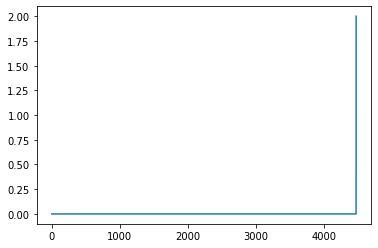

C:\Users\Annet\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


lower 1e-07 1.3626439059614344
lower 1.0108105820657262e-07 1.3626439059614344
lower 1.0217380328160545e-07 1.3626439059614344
lower 1.032783615669486e-07 1.3626439059614344
lower 1.0439486077028207e-07 1.3626439059614344
lower 1.0552342997987927e-07 1.3626439059614344
lower 1.0666419967953368e-07 1.3626439059614344
lower 1.0781730176364451e-07 1.3626439059614344
lower 1.0898286955246556e-07 1.3626439059614344
lower 1.1016103780752105e-07 1.3626439059614344
lower 1.1135194274718483e-07 1.3626439059614344
lower 1.1255572206243132e-07 1.3626439059614344
lower 1.1377251493275454e-07 1.3626439059614344
lower 1.1500246204225916e-07 1.3626439059614344
lower 1.162457055959278e-07 1.3626439059614344
lower 1.1750238933606084e-07 1.3626439059614344
lower 1.1877265855889724e-07 1.3626439059614344
lower 1.2005666013141294e-07 1.3626439059614344
lower 1.2135454250830058e-07 1.3626439059614344
lower 1.2266645574913548e-07 1.3626439059614344
lower 1.2399255153572328e-07 1.3626439059614344
lower 1.253

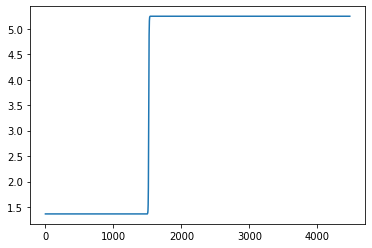

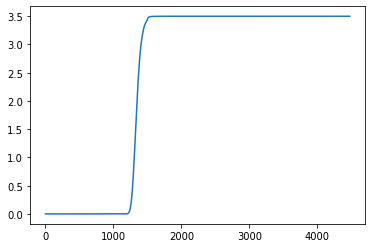

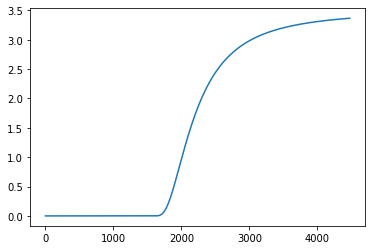

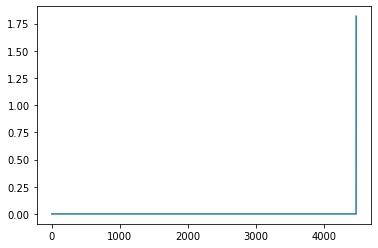

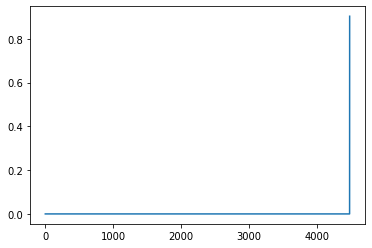

In [4]:
#Dof for the lower temperature range
dof_lower = np.zeros(len(temp_lower_tot))
errors_lower = np.zeros(len(temp_lower_tot)*len(boson_lower))
error_now_lower = 0

for i in np.arange(0,len(boson_lower)):
    if boson_lower[i] == True:
        for j in np.arange(0,len(temp_lower_tot)):
            single_lower = np.zeros(len(temp_lower_tot))
            lower_boson, new_error_boson = integrate_boson(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
            dof_lower[j] += lower_boson
            single_lower[j] = lower_boson
        plt.plot(single_lower)
        plt.show()

    else:
        single_lower = np.zeros(len(temp_lower_tot))
        for j in np.arange(0,len(temp_lower_tot)):
            nu_lower_bound = 1 #MeV
            nu_upper_bound = 3 #MeV
            if i == 1 and nu_lower_bound < temp_lower_tot[j] < nu_upper_bound:  #neutrino below e e annihilation temp 0.1 MeV, 
                neutrino, new_error_fermion = integrate_fermion(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
                lower_bound = (4/11)**(4/3)
                upper_bound = 1
                scaled_temp = (temp_lower_tot[j] - nu_lower_bound) / (nu_upper_bound - nu_lower_bound)
                a = lower_bound + (upper_bound - lower_bound) / (1 + np.exp(-15 * (scaled_temp - 0.5)))
                dof_lower[j]+= a*neutrino
                single_lower[j] = a*neutrino
                print(temp_lower_tot[j], single_lower[j])
           
            elif i == 1 and temp_lower_tot[j] <= nu_lower_bound:
                neutrino, new_error_fermion = integrate_fermion(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
                dof_lower[j]+=(4/11)**(4/3)*neutrino
                single_lower[j] = (4/11)**(4/3)*neutrino
                print('lower', temp_lower_tot[j], (4/11)**(4/3)*neutrino)
            elif i == 1 and temp_lower_tot[j] >= nu_upper_bound:
                neutrino, new_error_fermion = integrate_fermion(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
                dof_lower[j]+=neutrino
                single_lower[j] = neutrino
                print('other', temp_lower_tot[j], neutrino)
            else:
                lower_fermion, new_error_fermion = integrate_fermion(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
                dof_lower[j]+=lower_fermion
                single_lower[j] = lower_fermion
        plt.plot(single_lower)
        plt.show()

In [6]:
#Dof for the upper temperature range
dof_upper = np.zeros(len(temp_upper_tot))
errors_upper = np.zeros(len(temp_upper_tot)*len(boson_upper))
error_now_upper = 0

for i in np.arange(0,len(boson_upper)):
    if boson_upper[i] == True:
        for j in np.arange(0,len(temp_upper_tot)):
            upper_boson, new_error_upper = integrate_boson(temp_upper_tot[j], masses_upper[i], helicities_upper[i])
            dof_upper[j]+= upper_boson
            errors_upper[error_now_upper] = new_error_upper
            
    else:
        for j in np.arange(0,len(temp_upper_tot)):
            upper_fermion, new_error_upper = integrate_fermion(temp_upper_tot[j], masses_upper[i], helicities_upper[i])
            dof_upper[j]+= upper_fermion
            errors_upper[error_now_upper] = new_error_upper
    error_now_upper+=1

C:\Users\Annet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Annet\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


16.836908485082795
62.06640603695652


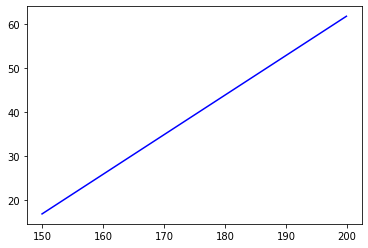

In [7]:
#Define points for line between lower and upper part
print(dof_lower[-1])
print(dof_upper[0])
x = [dof_lower[-1], dof_upper[0]]
y = [temp_lower_tot[-1], temp_upper_tot[0]]

def line(x, a, b):
    return a*x-134.919+b
temp_inbetween = np.linspace(150, 199.9, 100)
dof_inbetween = line(temp_inbetween, 0.9, dof_lower[-1])
plt.plot(temp_inbetween, dof_inbetween, 'b-', label='data')
popt, pcov = curve_fit(line, temp_inbetween, dof_inbetween)

In [8]:
#Extra dof etc for even lower temperature
#temperature_extra = np.logspace(-9, -4, 200)
temperature_extra = np.logspace(-9, -7, 200)
dof_extra = len(temperature_extra)*[dof_lower[0]]

In [9]:
#Combine the different ranges
all_temps = np.append(temperature_extra, np.append(temp_lower_tot, np.append(temp_inbetween,temp_upper_tot)))
all_dof_SM = np.append(dof_extra, np.append(dof_lower, np.append(dof_inbetween,dof_upper)))

In [10]:
#Write data to a panda file called 'dof_SM.csv', with columns of the dof, the temperature and the time
dof_SM_panda = pd.DataFrame(list(zip(np.transpose(all_dof_SM), np.transpose(all_temps))), columns=['dof', 'temperature'])
dof_SM_panda.to_csv('dof_SM_SUSY2.csv', index=False)

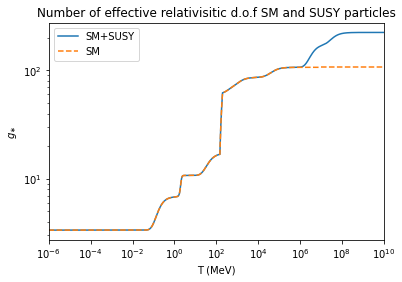

In [2]:
#Plot dof for the SM against the temperature
df_SM_SUSY = pd.read_csv('dof_SM_SUSY.csv')
plt.plot(df_SM_SUSY['temperature'], df_SM_SUSY['dof'], label='SM+SUSY')
df_SM = pd.read_csv('dof_SM.csv')
plt.plot(np.array(df_SM['temperature'])[:-700], np.array(df_SM['dof'])[:-700], linestyle='dashed', label="SM")
plt.plot(np.logspace(7,10,100), 100*[np.array(df_SM['dof'])[-1]], color='#ff7f0e', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (MeV)')
plt.ylabel(r'$g_{\ast}$')
plt.title('Number of effective relativisitic d.o.f SM and SUSY particles')
plt.xlim(10**(-6), 10**10)
plt.legend()
plt.savefig('dof_SM_SUSY2.png', bbox_inches='tight', dpi=400)
plt.show()

In [134]:
#In this part extra particles are added to the SM

#Adding a light particle (axion):
mass_axion = [10**(-3)]
helicity_axion = [1]
boson_axion = [True]
temp_axion = temp_lower_tot


#Adding a heavy particle:
mass_heavy = [10**6]
helicity_heavy = [1]
boson_heavy = [True]
temp_heavy = temp_upper_tot

In [135]:
dof_axion = np.zeros(len(temp_axion))

for i in np.arange(0,len(boson_axion)):
    if boson_axion[i] == True:
        for j in np.arange(0,len(temp_axion)):
            axion_boson=integrate_boson(temp_axion[j], mass_axion[i], helicity_axion[i])[0]
            dof_axion[j] += axion_boson
    else:
        for j in np.arange(0,len(temp_axion)):
            axion_fermion=integrate_fermion(temp_axion[j], mass_axion[i], helicity_axion[i])[0]
            dof_axion[j]+=axion_fermion

C:\Users\Annet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
dof_heavy = np.zeros(len(temp_heavy))
for i in np.arange(0,len(boson_heavy)):
    if boson_heavy[i] == True:
        for j in np.arange(0,len(temp_heavy)):
            heavy_boson = integrate_boson(temp_heavy[j], mass_heavy[i], helicity_heavy[i])[0]
            dof_heavy[j]+= heavy_boson
            
    else:
        for j in np.arange(0,len(temp_heavy)):
            heavy_fermion = integrate_fermion(temp_heavy[j], mass_heavy[i], helicity_heavy[i])[0]
            dof_heavy[j]+= heavy_fermion

C:\Users\Annet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [136]:
#Define points for line between lower and middle/upper part for the light particle
x_axion = [dof_lower[-1]+dof_axion[-1], dof_upper[0]+dof_axion[-1]]
y_axion = [temp_lower_tot[-1], temp_upper_tot[0]]

In [137]:
#Extra dof etc for even lower temperature
temperature_extra = np.logspace(-9, -4, 200)
dof_extra_axion = len(temperature_extra)*[dof_lower[0]+dof_axion[0]]
def line_axion(x, a, b):
    return a*x-133.919+b
temp_inbetween = np.linspace(150, 199.9, 100)
dof_inbetween_axion = line_axion(temp_inbetween, 0.9, dof_lower[-1]+dof_axion[-1])

#Add light and heavy particle to the dof already computed for the SM
all_dof_axion = np.append(dof_extra_axion, np.append(dof_lower+dof_axion, np.append(dof_inbetween_axion,dof_upper+dof_axion[-1])))
all_dof_heavy = np.append(dof_extra, np.append(dof_lower, np.append(dof_inbetween,dof_upper+dof_heavy)))

In [138]:
#Converting dof for axion and heavy particle in T to t(s)
time_axion = np.zeros(len(all_temps))
for i in np.arange(0, len(all_temps)):
    time_axion[i]=(0.74*(all_dof_axion[i]/10.75)**(-1/2)*all_temps[i]**(-2))
    
time_heavy = np.zeros(len(all_temps))
for i in np.arange(0, len(all_temps)):
    time_heavy[i]=(0.74*(all_dof_heavy[i]/10.75)**(-1/2)*all_temps[i]**(-2))

In [139]:
#Write data to a panda file called 'dof_axion.csv', with columns of the axion dof, the temperature and the time
dof_axion_nu_panda = pd.DataFrame(list(zip(np.transpose(all_dof_axion), np.transpose(all_temps), np.transpose(time_axion))), columns=['axion_dof', 'temperature', 'axion_time'])
dof_axion_nu_panda.to_csv('dof_axion_nu.csv', index=False)

#Write data to a panda file called 'dof_heavy.csv', with columns of the heavy dof, the temperature and the time
dof_heavy_nu_panda = pd.DataFrame(list(zip(np.transpose(all_dof_heavy), np.transpose(all_temps), np.transpose(time_heavy))), columns=['heavy_dof', 'temperature', 'heavy_time'])
dof_heavy_nu_panda.to_csv('dof_heavy_nu.csv', index=False)

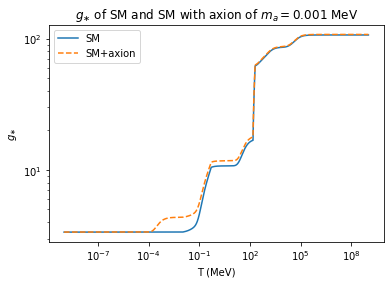

In [140]:
#Now plot the dof for the SM+axion and compare to the SM
df_SM = pd.read_csv('dof_SM_nu.csv')
df_axion = pd.read_csv('dof_axion_nu.csv')
plt.plot(df_SM['temperature'], df_SM['dof'], label='SM')
plt.plot(df_axion['temperature'], df_axion['axion_dof'], label='SM+axion', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (MeV)')
plt.ylabel(r'$g_{\ast}$')
plt.title(r'$g_{\ast}$ of SM and SM with axion of '+ r'$ m_a = ${}'.format(mass_axion[0]) + r' MeV')
plt.legend()
plt.show()

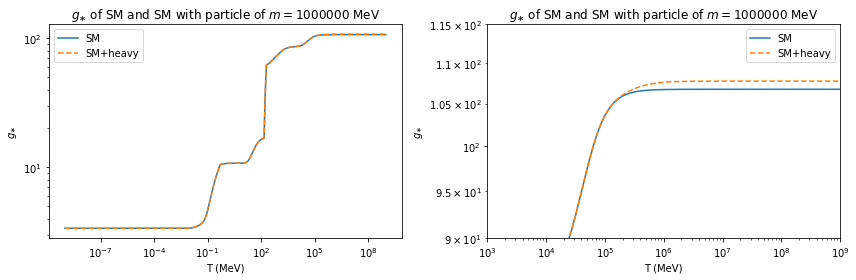

In [141]:
#And plot the dof for the SM+heavy and compare to the SM, right is a close up of the left figure
df_SM = pd.read_csv('dof_SM_nu.csv')
df_heavy = pd.read_csv('dof_heavy_nu.csv')
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(df_SM['temperature'], df_SM['dof'], label='SM')
plt.plot(df_heavy['temperature'], df_heavy['heavy_dof'], label='SM+heavy', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (MeV)')
plt.ylabel(r'$g_{\ast}$')
plt.title(r'$g_{\ast}$ of SM and SM with particle of '+ r'$ m = ${}'.format(mass_heavy[0]) + r' MeV')
plt.legend()
plt.subplot(122)
plt.plot(df_SM['temperature'], df_SM['dof'], label='SM')
plt.plot(df_heavy['temperature'], df_heavy['heavy_dof'], label='SM+heavy', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (MeV)')
plt.ylabel(r'$g_{\ast}$')
plt.title(r'$g_{\ast}$ of SM and SM with particle of '+ r'$ m = ${}'.format(mass_heavy[0]) + r' MeV')
plt.legend()
plt.xlim(10**3, 10**9)
plt.ylim(90, 115)
plt.tight_layout()
plt.show()